
El porcentaje de aciertos de la prediccion lineal es: 88.11188811188812 %.


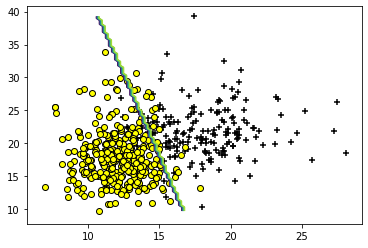


El porcentaje de aciertos de la prediccion con el kernel gaussiano y valores de sigma = 10 y C = 1 es: 91.6083916083916 %.


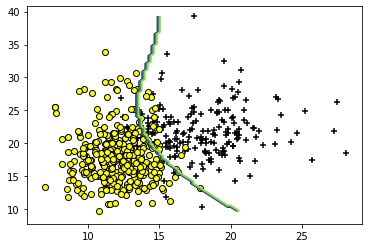

In [1]:
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import scipy . optimize as opt
from sklearn import svm
import codecs

import re
import nltk
import nltk.stem.porter


from sklearn.model_selection import train_test_split

def carga_csv(filename) :
    valores = read_csv(filename, header=None).values
    return valores

datos = carga_csv("Data/wdbc.csv")
X = datos[:, 2:4]
X = X.astype(float)

y = datos[:, 1]

#Separamos el datasheet en conjuntos de entretamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y)

y = np.array(y == 'M').astype(int)
y = y.reshape(len(y), 1)

y_train = np.array(y_train == 'M').astype(int)
y_train = y_train.reshape(len(y_train), 1)

y_test = np.array(y_test == 'M').astype(int)
y_test = y_test.reshape(len(y_test), 1)


#Instanciamos el clasificador:

svm_linear = svm.SVC( kernel= 'linear' , C=100.0)


#Entrenamos el clasificador
svm_linear.fit(X_train, y_train.ravel())

#Pintamos los puntos
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)

pos = (y == 1).ravel()
neg = (y == 0).ravel()

plt.figure()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')


linear_prediction = svm_linear.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
score_linear = svm_linear.score(X_test, y_test) * 100
print("\nEl porcentaje de aciertos de la prediccion lineal es: " + str(score_linear)+" %.")

plt.contour(x1, x2, linear_prediction)
plt.show()

#Prediccion con el kernel gaussiano

#Eleccion de sigma y c:
listaC = (0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30)
listaSigma = listaC

mejor_sigma = 0
mejor_c = 0

mejor_score = 0

for valorC in listaC:
    for valorSigma in listaSigma:
        svm_rbf = svm.SVC(kernel='rbf', C=valorC, gamma=1 /(2*valorSigma**2))
        svm_rbf.fit(X_train, y_train.flatten())
        score = svm_rbf.score(X_test, y_test)
        
        if (score > mejor_score):
            mejor_score = score
            mejor_sigma = valorSigma
            mejor_c = valorC


svm_rbf = svm.SVC(kernel='rbf', C=mejor_c, gamma=1 /(2*mejor_sigma**2))

svm_rbf.fit(X_train, y_train.ravel())

rbf_prediction = svm_rbf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)

score_rbf = svm_rbf.score(X_test, y_test) * 100

print("\nEl porcentaje de aciertos de la prediccion con el kernel gaussiano y valores de sigma = " + str(mejor_sigma) + " y C = " + str(mejor_c) + " es: " + str(score_rbf)+" %.")

plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.contour(x1, x2, rbf_prediction)
plt.show()

